<a href="https://colab.research.google.com/github/Victory91/Group-A-Data-science-project/blob/main/Blood%20Pressure%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BLOOD PRESSURE PREDICTION MODEL**

##**Introduction**

###**Problem statement**

Create a model to predict the blood pressure of patients using a diverse range of demographic, lifestyle, and clinical attributes to ensure a holistic representation of potential disease determinants.

###**Source for Relevant Data**

Dataset was gotten online

https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data

###**Import dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor


import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("/content/drive/MyDrive/Pluralcode Data Science/heart_disease.csv")


##**Data Exploration and Preprocessing**

###**Dataset Examination**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


###**Data Cleaning**

In [ ]:
df.isnull().sum()

,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [ ]:
df.info()
df.fillna(method = "ffill", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Exercise Habits,0
Smoking,0
Family Heart Disease,0
Diabetes,0
BMI,0
High Blood Pressure,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10000 non-null  float64
 1   Gender                10000 non-null  object 
 2   Blood Pressure        10000 non-null  float64
 3   Cholesterol Level     10000 non-null  float64
 4   Exercise Habits       10000 non-null  object 
 5   Smoking               10000 non-null  object 
 6   Family Heart Disease  10000 non-null  object 
 7   Diabetes              10000 non-null  object 
 8   BMI                   10000 non-null  float64
 9   High Blood Pressure   10000 non-null  object 
 10  Low HDL Cholesterol   10000 non-null  object 
 11  High LDL Cholesterol  10000 non-null  object 
 12  Alcohol Consumption   10000 non-null  object 
 13  Stress Level          10000 non-null  object 
 14  Sleep Hours           10000 non-null  float64
 15  Sugar Consumption   

###**Exploratory Data Analysis**

####**Boxplot of Blood Pressure**

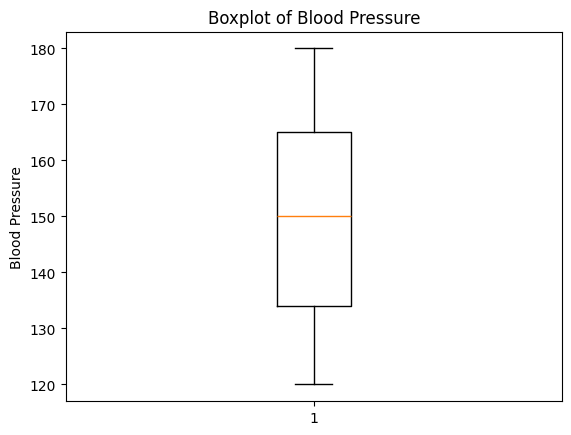

In [ ]:
# boxplot of Blood Pressure

plt.boxplot(df["Blood Pressure"])
plt.title("Boxplot of Blood Pressure")
plt.ylabel("Blood Pressure")
plt.show()

####**Scatterplot of Age and Blood Pressure**

Text(0, 0.5, 'Blood Pressure')

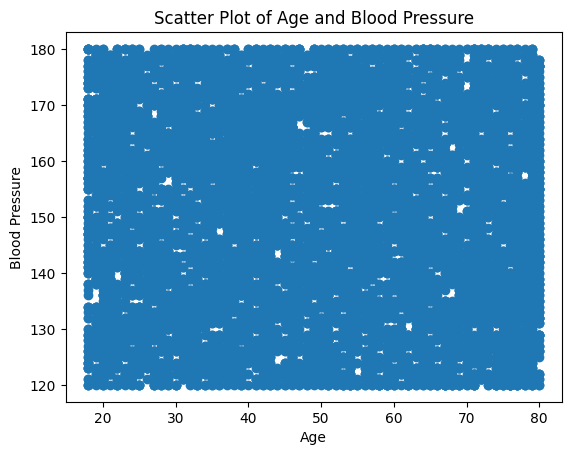

In [ ]:
# scatterplot of Age and Blood Pressure

plt.scatter(x = df["Age"],y = df["Blood Pressure"])
plt.title("Scatter Plot of Age and Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")

####**Correlation Plot and Matrix**

In [ ]:
# Plotting Correlation plot for Heart Disease Status and other columns
df["Heart Disease Status"] = df["Heart Disease Status"].map({'Yes': 1, 'No': 0})

In [ ]:
# Plotting the Correlation matrix
df[["Heart Disease Status", "Blood Pressure", "Cholesterol Level", "BMI", "Age",]].corr()

,Heart Disease Status,Blood Pressure,Cholesterol Level,BMI,Age
Heart Disease Status,1.000000,-0.013410,0.003106,0.019809,-0.009099
Blood Pressure,-0.013410,1.000000,-0.011522,0.005768,-0.021569
Cholesterol Level,0.003106,-0.011522,1.000000,0.022096,0.011147
BMI,0.019809,0.005768,0.022096,1.000000,0.011709
Age,-0.009099,-0.021569,0.011147,0.011709,1.000000


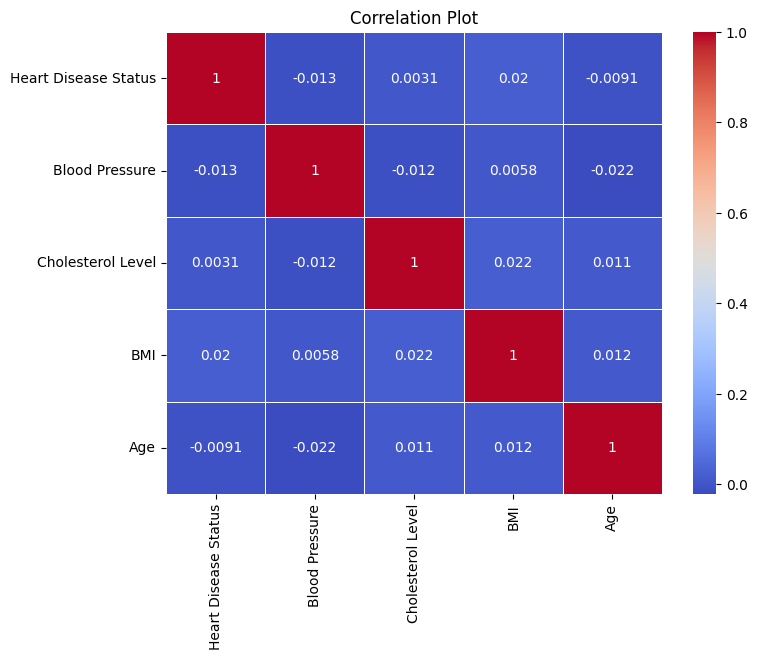

In [ ]:
# Plotting the correlation matrix

corr = df[["Heart Disease Status", "Blood Pressure", "Cholesterol Level", "BMI", "Age"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

###**Feature Engineering**


Polynomial Features: Sometimes the relationship between the features and the target variable is not linear. Try creating polynomial features (e.g., square, cube) to capture non-linear relationships.

In [ ]:
# Generate Polynomial Features:we'll focus on squaring the features (degree=2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['Age']])

X_poly

array([[  56., 3136.],
       [  69., 4761.],
       [  46., 2116.],
       ...,
       [  73., 5329.],
       [  23.,  529.],
       [  38., 1444.]])

In [ ]:
# create a new dataframe

df_poly = pd.DataFrame(X_poly, columns=['Age', 'Age^2'])
df_poly['Blood Pressure'] = df['Blood Pressure']

print(df_poly)

       Age   Age^2  Blood Pressure
0     56.0  3136.0           153.0
1     69.0  4761.0           146.0
2     46.0  2116.0           126.0
3     32.0  1024.0           122.0
4     60.0  3600.0           166.0
...    ...     ...             ...
9995  25.0   625.0           136.0
9996  38.0  1444.0           172.0
9997  73.0  5329.0           152.0
9998  23.0   529.0           142.0
9999  38.0  1444.0           128.0

[10000 rows x 3 columns]


####**Data Trimming**

In [ ]:
# trimming the data to relevant columns

model_df = df_poly[["Age^2", "Blood Pressure"]]
model_df

,Age^2,Blood Pressure
0,3136.0,153.0
1,4761.0,146.0
2,2116.0,126.0
3,1024.0,122.0
4,3600.0,166.0
...,...,...
9995,625.0,136.0
9996,1444.0,172.0
9997,5329.0,152.0
9998,529.0,142.0


##**Model Development**

###**Model Selection**

The model to use is Simple Linear Regression



###**Spliting of dataset**

In [ ]:
# divide data into feature matrix and target vector

feature = ["Age^2"] # square brackets, since it's a matrix ie since it is a single matrix if we had multiple columns it would be seperated by commas.
target = "Blood Pressure"

X = model_df[feature] # model_df[["Age^2"]]
y = model_df[target]

In [ ]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###**Baseline Model**

In [ ]:
# Let's create a baseline model by getting a mean value

baseline_model = y_train_mean = y_train.mean()

y_train_mean

149.65985714285713

In [ ]:
# let's create predictions using the baseline model

# baseline_pred = is a model which should be tested using test values to generate a set of predictions

baseline_pred = y_train_pred = [y_train_mean] * len(y_test)

y_train_pred

[149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714285713,
 149.65985714

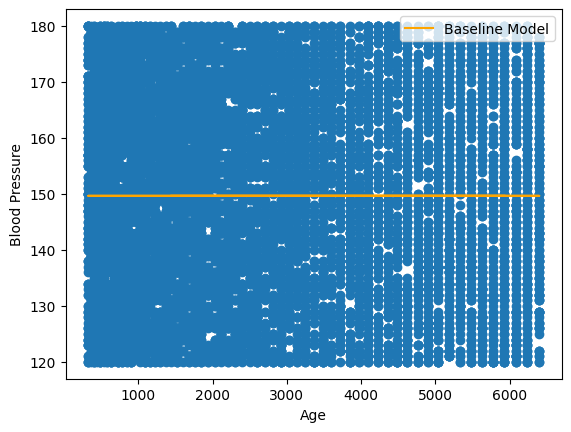

In [ ]:
# visualizing the baseline on a scatterplot

# plot X_test against y_train_pred

plt.plot(X_test.values, y_train_pred, color="Orange", label="Baseline Model")
plt.scatter(X, y)
plt.xlabel("Age") # age
plt.ylabel("Blood Pressure") # Blood Pressure
plt.legend()
plt.show()

####**Baseline Model Evaluation**

In [ ]:
# MAE for baseline model

baseline_model = y_train_mean

baseline_mae = mean_absolute_error(y_test, y_train_pred)

print("The mean value of y_train values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))

The mean value of y_train values is: 149.66
The baseline MAE is: 15.2


##**Build and Evaluate Model**

####**Model Fitting (Training)**

In [ ]:
# Creating a simple linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

####**Model Testing with Training Data**

In [ ]:
# we'd generate predictions using X_train

model_pred_train = model.predict(X_train)

model_pred_train

array([150.07303947, 149.89642305, 149.5145497 , ..., 149.74438972,
       150.20192172, 149.27778822])

######**Evaluation Metrics 1**

In [ ]:
# Mean Absolute Error of Model's trained data

model_train_mae = mean_absolute_error(y_train, model_pred_train)

print("The training MAE is:", round(model_train_mae, 2))

The training MAE is: 15.27


In [ ]:
# print baseline and model's Training mae to compare

print("The baseline MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))

The baseline MAE is:		 15.2
The model (train) MAE is:	 15.27


###**Model Testing with Testing Data**

In [ ]:
model_test_pred = model.predict(X_test)

model_test_pred

array([149.97279772, 148.90235898, 150.22197008, ..., 149.83412996,
       150.19118154, 148.90235898])

In [ ]:
y_pred = model.predict(df_poly[['Age^2']])
y_pred

array([149.56896665, 149.18112653, 149.81241091, ..., 149.04556149,
       150.19118154, 149.97279772])

######**Evaluation Metrics 2**

In [ ]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

print("The test MAE is:", round(model_test_mae, 2))

The test MAE is: 15.21


In [ ]:
# Compare Baseline MAE, Model training MAE and Model testing MAE
# print baseline, Model (train) and Model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))
print("The model (test) MAE is:\t", round(model_test_mae, 2))

The baseline MAE is:		 15.2
The model (train) MAE is:	 15.27
The model (test) MAE is:	 15.21


##**Report Model Performance**

###**Visualization**

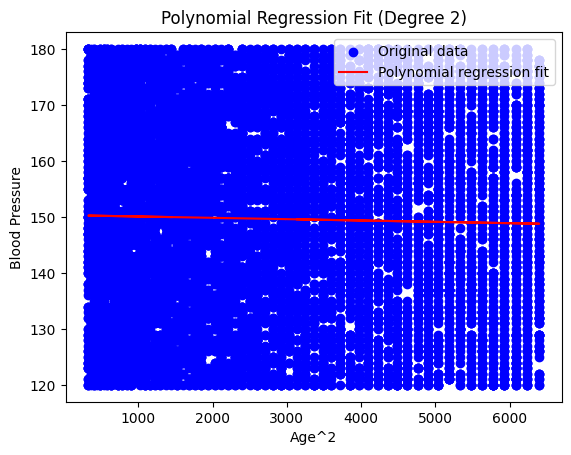

In [ ]:
plt.scatter(df_poly['Age^2'], df_poly['Blood Pressure'], color='blue', label='Original data')
plt.plot(df_poly['Age^2'], y_pred, color='red', label='Polynomial regression fit')
plt.xlabel('Age^2')
plt.ylabel('Blood Pressure')
plt.title('Polynomial Regression Fit (Degree 2)')
plt.legend()
plt.show()

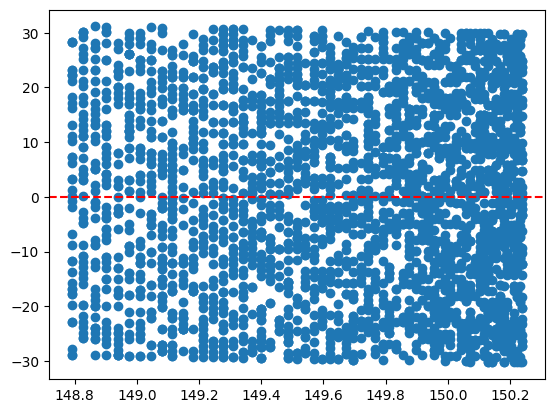

In [ ]:
y_pred = model.predict(X_test)  # Generate predictions only for the test data

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

###**Interpretation**
Mean Absolute Error (MAE): A lower MAE indicates better model performance.

R-squared: A value closer to 1 indicates that the model explains a high proportion of the variance in the data.

Visualization: The scatter plot should show a close alignment between actual and predicted values, and the residual plot should show residuals randomly scattered around zero.

Analyzing the Plot

Random Distribution of Residuals: Ideally, the residuals (blue dots) should be randomly scattered around the red dashed line (y = 0). This indicates that the model is capturing the relationship well and that there are no obvious patterns of bias.

Clustering of Residuals: In the plot, there seems to be a noticeable clustering of residuals around certain predicted values, particularly around 148, 150, and 152. This suggests that the model might not be capturing some underlying structure in the data or that there are groups of data points with similar predicted values.

Does the Model Work Well?
The model seems to work reasonably well, as the residuals are centered around zero and do not show a clear pattern. However, the clustering of residuals at certain predicted values might indicate that:

Possible Underlying Structure: There might be an underlying structure in the data that the model isn't capturing.

Model Fit: The model might need further refinement to improve its fit to the data.






##**Alternative Model**

###**Random Forest Regression**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Pluralcode Data Science/heart_disease.csv")


In [ ]:
df.info()
df.fillna(method = "ffill", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [ ]:
# Split Data into Training and Testing sets

In [ ]:
X = df[["Age"]]  # Use double brackets to create a DataFrame
y = df["Blood Pressure"]  # Replace with your target data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

####**Initialize and Train the Random Forest Regressor**

In [ ]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

####**Make Predictions**

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

y_pred

array([148.63113551, 147.35327242, 147.82053531, ..., 148.18378424,
       151.47116569, 147.35327242])

####**Evaluate the Model**

In [ ]:
# Calculate Mean Absolute Error and R-squared

model_test_mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The MAE is:\t\t", round(model_test_mae, 2))
print("The R-squared is:\t", round(r2, 2))

The MAE is:		 15.26
The R-squared is:	 -0.01


####**Model Reporting**

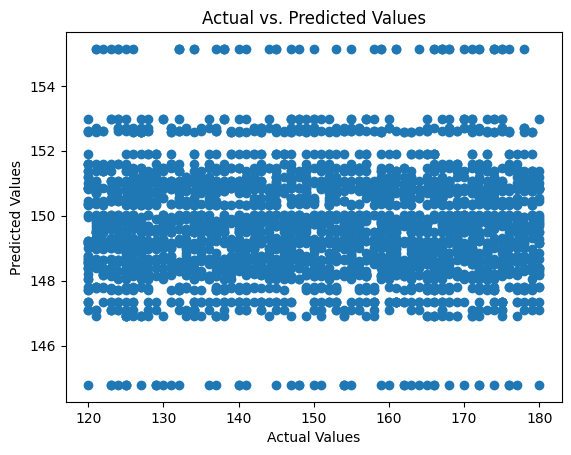

In [ ]:
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()



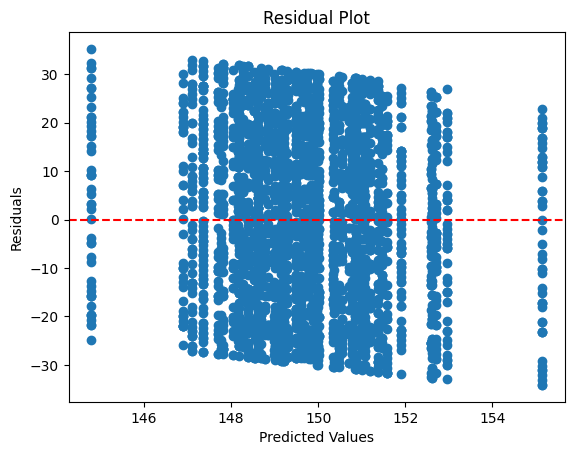

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()